In [1]:
"""
Apply functions to large files using
BatchProcessor.single_channel_apply
"""

import logging
import os

import matplotlib.pyplot as plt

from yass.batch import BatchProcessor
from yass.batch import RecordingsReader
from yass.preprocess.filter import butterworth

/Users/Edu/miniconda3/envs/yass/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
logging.basicConfig(level=logging.INFO)


path_to_neuropixel_data = (os.path.expanduser('~/data/ucl-neuropixel'
                           '/rawDataSample.bin'))
path_to_filtered_data = (os.path.expanduser('~/data/ucl-neuropixel'
                         '/tmp/filtered.bin'))

In [3]:
# create batch processor for the data
bp = BatchProcessor(path_to_neuropixel_data,
                    dtype='int16', n_channels=385, data_format='wide',
                    max_memory='500MB')

In [4]:
# appply a single channel transformation, each batch will be all observations
# from one channel, results are saved to disk
bp.single_channel_apply(butterworth,
                        mode='disk',
                        output_path=path_to_filtered_data,
                        low_freq=300, high_factor=0.1,
                        order=3, sampling_freq=30000,
                        channels=[0, 1, 2])

INFO:yass.batch.batch:Applying function yass.preprocess.filter.butterworth...
INFO:yass.batch.batch:yass.preprocess.filter.butterworth took 0.30286192893981934 seconds


('/Users/Edu/data/ucl-neuropixel/tmp/filtered.bin',
 {'data_format': 'wide', 'dtype': 'float64', 'n_channels': 3})

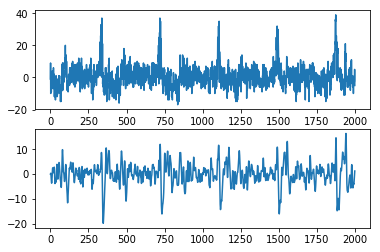

In [5]:
# let's visualize the results
raw = RecordingsReader(path_to_neuropixel_data, dtype='int16',
                       n_channels=385, data_format='wide')

# you do not need to specify the format since single_channel_apply
# saves a yaml file with such parameters
filtered = RecordingsReader(path_to_filtered_data)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(raw[:2000, 0])
ax2.plot(filtered[:2000, 0])
plt.show()